<a href="https://colab.research.google.com/github/Luisserra99/SSTD_2025/blob/main/projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Luís Eduardo Curi Serra
## Matrícula: 251033574

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais.
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n].

Em seguida, use a sua função para encontrar o sinal decimado para a entrada:

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [108]:
def decimacao_fator2(x):
  if len(x)>1:
      y = np.array([ x[ int(2*i) ] for i in range(len(x)//2)])
  else:
    y = x
  return y


In [109]:
#VALIDAÇÃO 1A
x = np.array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0])
print(decimacao_fator2(x))

[1 1 1 1 1 1 1 1 1 1]


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior.

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [110]:
def expancao_fator2(y):
    if len(y) > 0:
        z = np.array([ y[ i // 2 ] for i in range( len(y) * 2 )])
    else:
        z = y
    return z

In [111]:
#VALIDAÇÃO 1B
x = np.array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0])
print(expancao_fator2(x))

[1 1 2 2 1 1 0 0 1 1 2 2 1 1 0 0 1 1 2 2 1 1 0 0 1 1 2 2 1 1 0 0 1 1 2 2 1
 1 0 0]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões.
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512


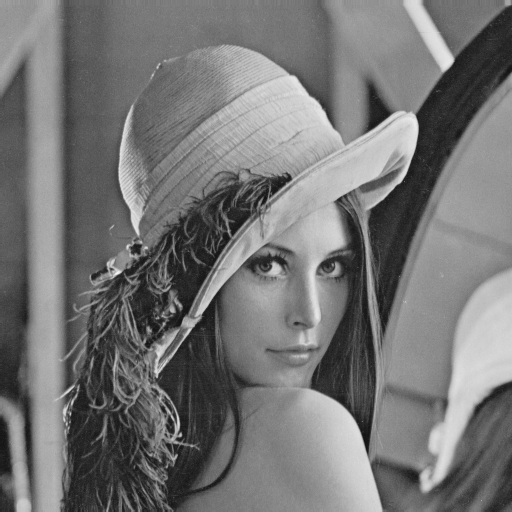

In [112]:
### Código da questão 1c.
im = Image.open("lena.bmp")  #O objeto im é da classe Image.
A = np.array(im)             #Transformo o objeto Image para a classe NP.array
h, w = A.shape
print(f'Imagem original de tamanho: {h} x {w}')
im

Imagem decimada de tamanho: 32 x 32


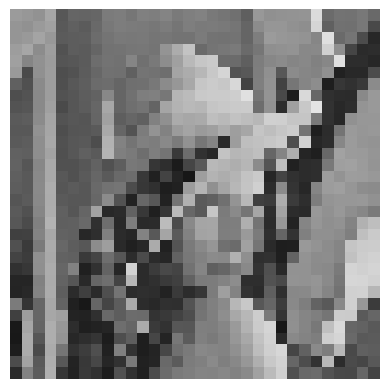

In [113]:
A_decimado = np.copy(A) # Copia A para não modificaer

for i in range(4):
  h_d, w_d = A_decimado.shape  # pega os valores atauais de tamanho
  A_n = np.zeros((h_d,w_d//2)) # criar o vetor que vai abrigar a coluna decimada

  for j in range(h_d):
    A_n[j,:] = decimacao_fator2(A_decimado[j,:]) #aplica decimação nas colunas

  A_decimado = np.copy(A_n)   # copia o vetor novo para o a original
  A_n = np.zeros((h_d//2,w_d//2)) # agora o vetor final totalmente decimado
  for j in range(w_d//2):
    A_n[:,j] = decimacao_fator2(A_decimado[:,j])
  A_decimado = np.copy(A_n)

# Preparações para o print
h_d, w_d = A_decimado.shape
im_decimada = Image.fromarray(A_decimado)
print(f'Imagem decimada de tamanho: {h_d} x {w_d}')
plt.imshow(im_decimada, cmap='gray')
plt.axis('off')
plt.show()

## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada.

Imagem expandida de tamanho: 512 x 512


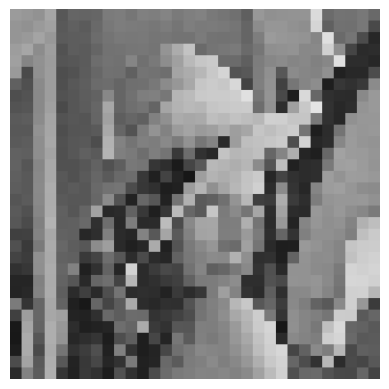

In [114]:
A_expandida = np.copy(A_decimado) # Copia A para não modificaer

for i in range(4):
  h_e, w_e = A_expandida.shape  # pega os valores atauais de tamanho
  A_n = np.zeros((h_e,w_e*2)) # criar o vetor que vai abrigar a coluna expandida

  for j in range(h_e):
    A_n[j,:] = expancao_fator2(A_expandida[j,:]) #aplica decimação nas colunas

  A_expandida = np.copy(A_n)   # copia o vetor novo para o a original
  A_n = np.zeros((h_e*2,w_e*2)) # agora o vetor final totalmente decimado

  for j in range(w_e*2):
    A_n[:,j] = expancao_fator2(A_expandida[:,j])

  A_expandida = np.copy(A_n)

# Preparações para o print
h_e, w_e = A_expandida.shape
im_expandida = Image.fromarray(A_expandida)
print(f'Imagem expandida de tamanho: {h_e} x {w_e}')
plt.imshow(im_expandida, cmap='gray')
plt.axis('off')
plt.show()

# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

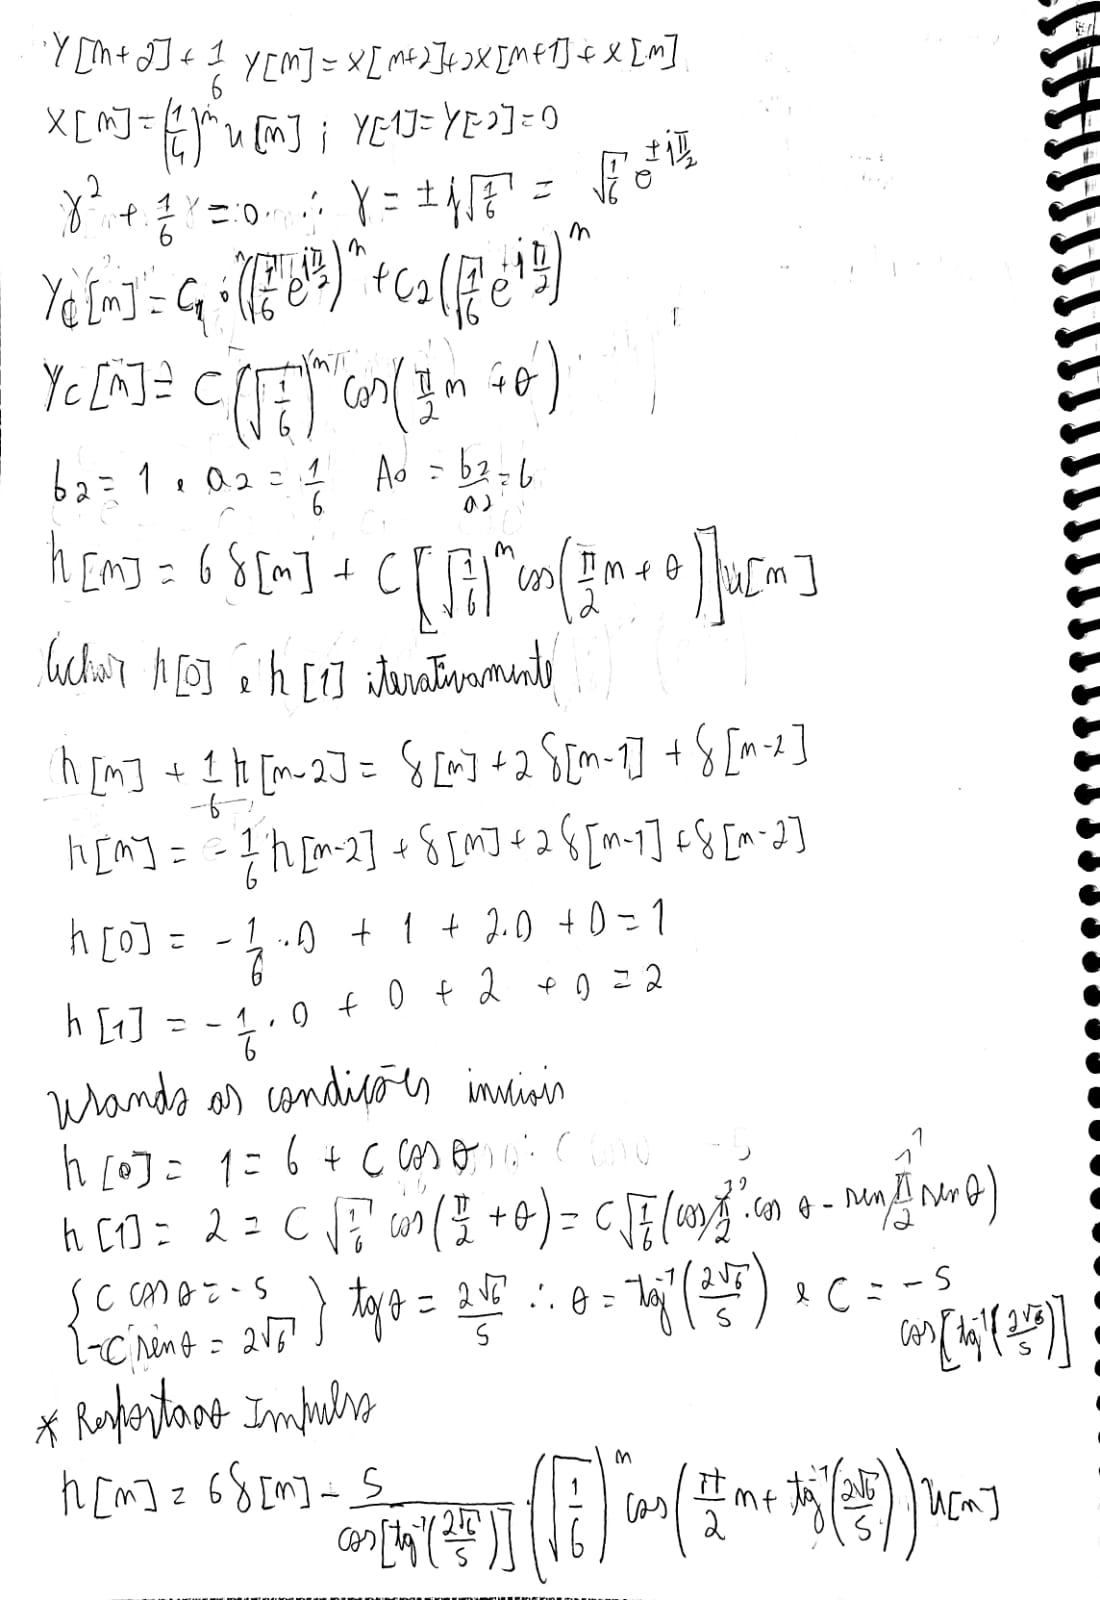

In [136]:
### Código da questão 2a.

i2a = Image.open("sol2a.jpeg")

i2a

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

In [116]:
### Código da questão 2b.
def impulso(n):
  if n == 0:
    return 1
  else:
    return 0

In [117]:
#Resposta iterativa

def resposta_ao_impulso_iterativa(x):
  y = np.array([])
  for i in range(len(x)):
    if i < 2:
      calculo = impulso(i) + 2*impulso(i-1) + impulso(i-2)
      y = np.append(y, calculo)
    elif i == 2:
      calculo = -1/6*y[i-2] + impulso(i) + 2*impulso(i-1) + impulso(i-2)
      y = np.append(y, calculo)
    else:
      y = np.append(y, -1/6 * y[i-2])
  return y


In [118]:
#Resposta Analitica
def resposta_ao_impulso_analitica(x):
  y = np.array([])
  theta = np.arctan(2*np.sqrt(6)/5)
  C     = -5/np.cos(theta)
  for i in range(len(x)):
    calculo = 6*impulso(i) + C * ((np.sqrt(1/6))**i) * np.cos(i*np.pi/2 + theta)

    y = np.append(y, calculo)
  return y

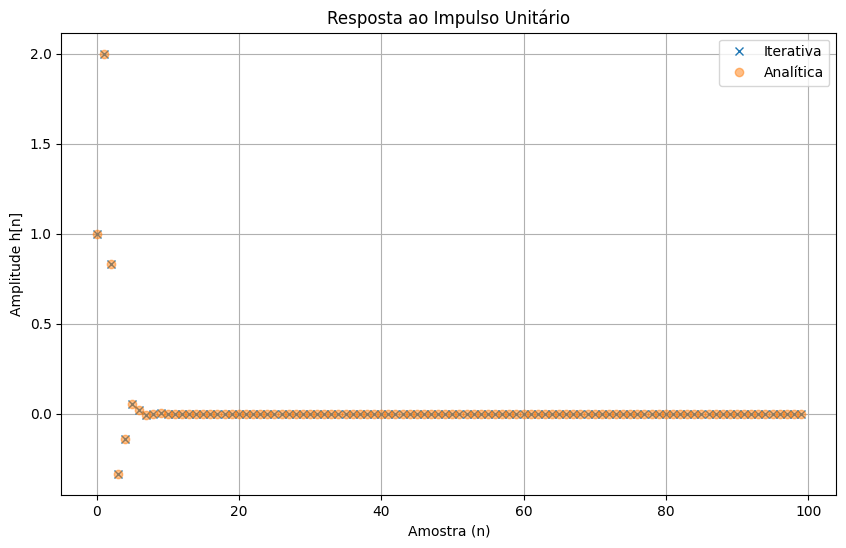

In [119]:
#plot comparativo
x = np.arange(100)

plt.figure(figsize=(10, 6))

# Plota os dados com marcadores, sem linhas de conexão
plt.plot(x, resposta_ao_impulso_iterativa(x), marker='x', linestyle='None', label='Iterativa')
plt.plot(x, resposta_ao_impulso_analitica(x), marker='o', linestyle='None', label='Analítica', alpha=0.5)

# --- CORREÇÃO APLICADA AQUI ---
# Define os rótulos dos eixos e a legenda em chamadas separadas
plt.xlabel('Amostra (n)')
plt.ylabel('Amplitude h[n]')
plt.legend()

# Define o título e a grade
plt.title('Resposta ao Impulso Unitário')
plt.grid(True)

# Mostra o gráfico
plt.show()

In [120]:
def MSE(func1,func2,x):
  mse = 0
  func_A = func1(x)
  func_B = func2(x)
  for i in range(len(x)):
    mse += (func_A[i] - func_B[i])**2
  return mse/len(x)

#inicializa x
x = np.arange(100)

#Print do valor
print('MSE', MSE(resposta_ao_impulso_iterativa, resposta_ao_impulso_analitica, x))
print('O erro real é nulo, sendo apenas devido a precisão numérica do computador')

MSE 4.719614126536087e-33
O erro real é nulo, sendo apenas devido a precisão numérica do computador


## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

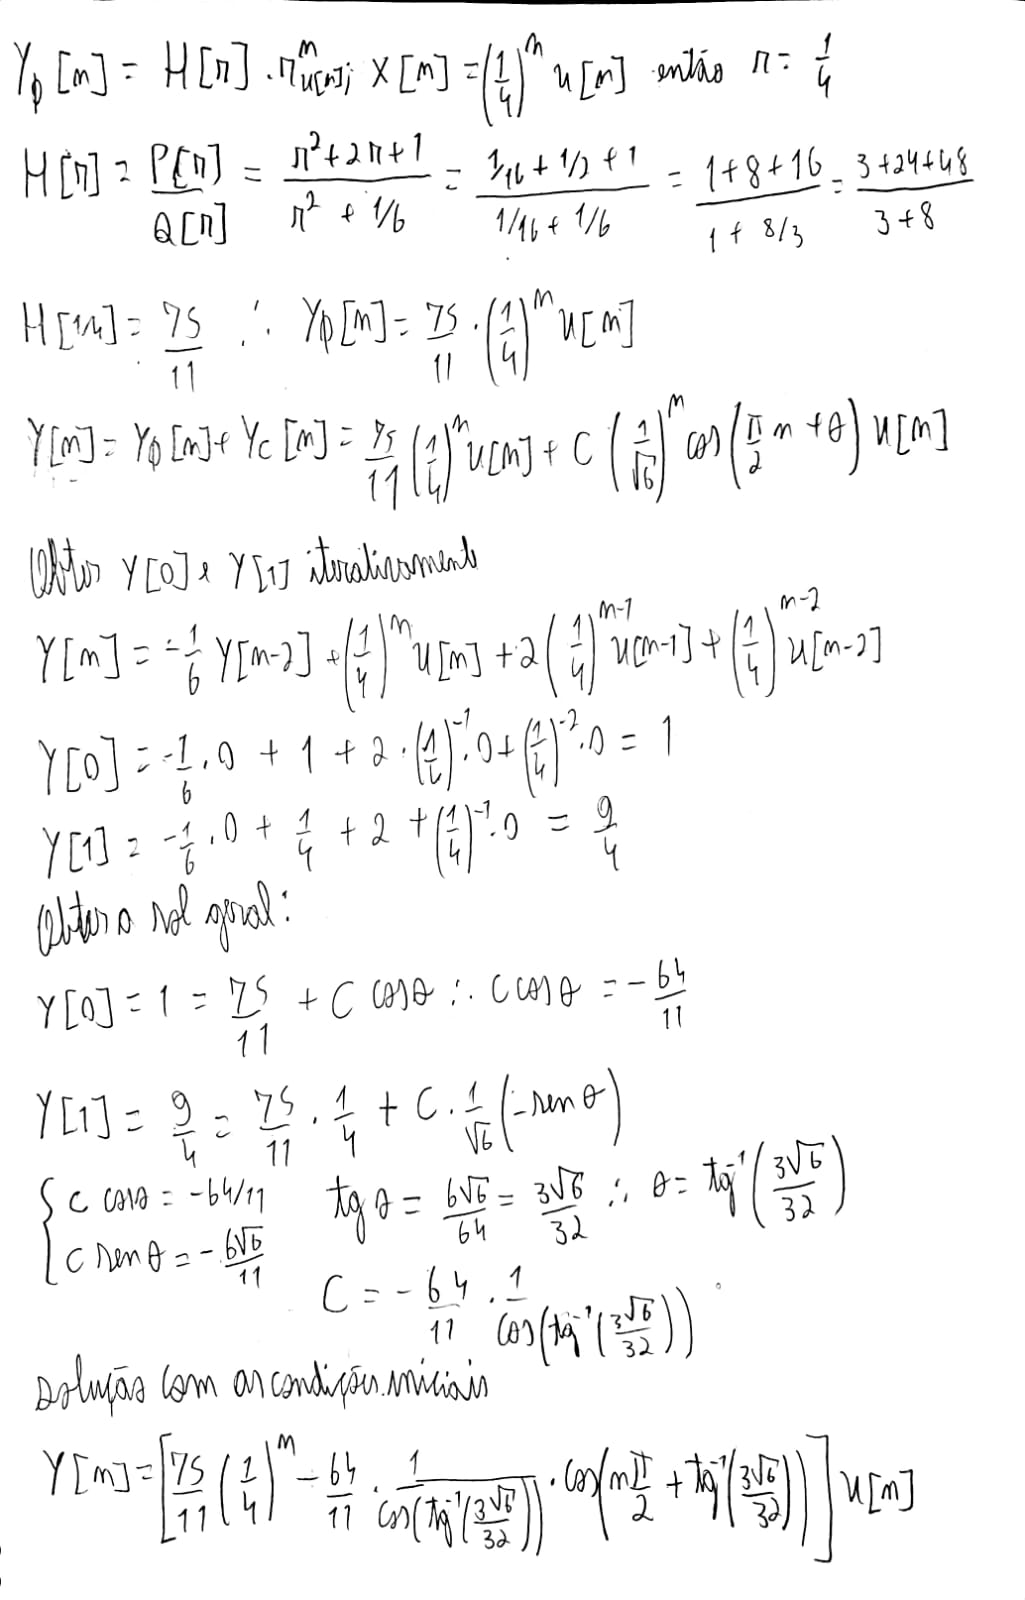

In [121]:
### Código da questão 2c.

i2c = Image.open("sol2c.jpeg")

i2c

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

In [122]:
### Código da questão 2d.

# sinal de entrada x
def x_entrada(x):
  y = np.array([])
  for i in range(len(x)):
    calculo = ((1/4)**i)
    y = np.append(y, calculo)
  return y

In [123]:
# convolução da resposta iterativa com o sinal de entrada
def resposta_ao_forcada_convolucao(x):
  y = np.array([])
  h_i = resposta_ao_impulso_iterativa(x)
  x_s = x_entrada(x)
  for i in range(len(x)):
    soma = 0
    # O somatório é feito n-19 até n, ou seja em 100 ele vai usar 81 até 100
    for j in range(20):
      if i < j:
        soma += 0
      else:
        soma += x_s[j]*h_i[i-j]
    y = np.append(y, soma)
  return y

In [124]:
#Resposta Analitica
def resposta_ao_forcada_analitica(x):
  y = np.array([])
  theta = np.arctan(3*np.sqrt(6)/32)
  C     = -(64/11)/np.cos(theta)
  for i in range(len(x)):
    calculo = (75/11)*(1/4)**i + C * ((np.sqrt(1/6))**i) * np.cos(i*np.pi/2 + theta)

    y = np.append(y, calculo)
  return y

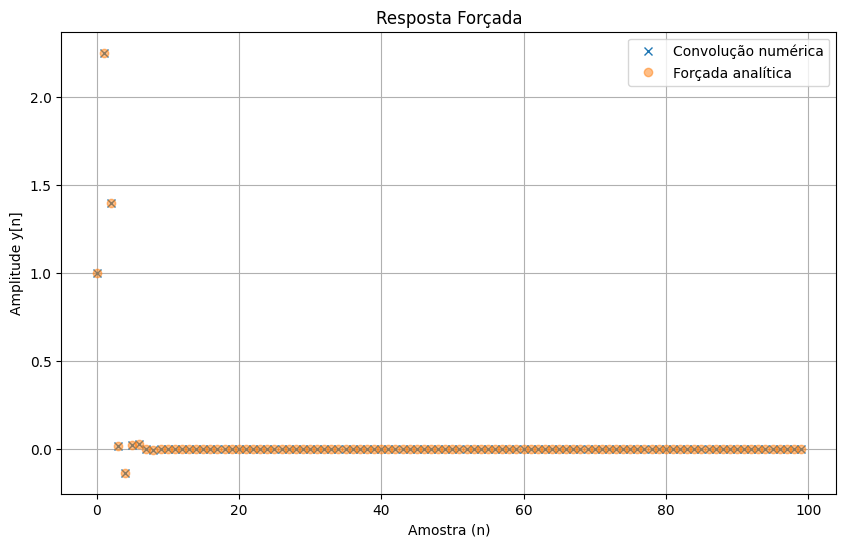

In [125]:
#plot comparativo
x = np.arange(100)

plt.figure(figsize=(10, 6))

# Plota os dados com marcadores, sem linhas de conexão
plt.plot(x, resposta_ao_forcada_convolucao(x), marker='x', linestyle='None', label='Convolução numérica')
plt.plot(x, resposta_ao_forcada_analitica(x), marker='o', linestyle='None', label='Forçada analítica', alpha=0.5)

# --- CORREÇÃO APLICADA AQUI ---
# Define os rótulos dos eixos e a legenda em chamadas separadas
plt.xlabel('Amostra (n)')
plt.ylabel('Amplitude y[n]')
plt.legend()

# Define o título e a grade
plt.title('Resposta Forçada')
plt.grid(True)

# Mostra o gráfico
plt.show()

In [126]:
def MSE(func1,func2,x):
  mse = 0
  func_A = func1(x)
  func_B = func2(x)
  for i in range(len(x)):
    mse += (func_A[i] - func_B[i])**2
  return mse/len(x)

#inicializa x
x = np.arange(100)

#Print do valor
print('MSE', MSE(resposta_ao_forcada_convolucao, resposta_ao_forcada_analitica, x))
print('O erro real é nulo, sendo apenas devido a precisão numérica do computador, mesmo com a redução do número de amostras')

MSE 6.642784235872657e-26
O erro real é nulo, sendo apenas devido a precisão numérica do computador, mesmo com a redução do número de amostras


## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema.

In [127]:
### Códgio da Questão 2e
sinal = sp.io.loadmat('data_projeto1.mat')['sinal'].ravel()

In [128]:
# convolução da resposta iterativa com o sinal customizado
def resposta_convolucao_convolucao(s):
  y = np.array([])
  x = x = np.arange(len(s))
  h_i = resposta_ao_impulso_iterativa(x)
  for i in range(len(s)):
    soma = 0
    # O somatório é feito n-19 até n, ou seja em 100 ele vai usar 81 até 100
    for j in range(20):
      if i < j:
        soma += 0
      else:
        soma += s[j]*h_i[i-j]
    y = np.append(y, soma)
  return y

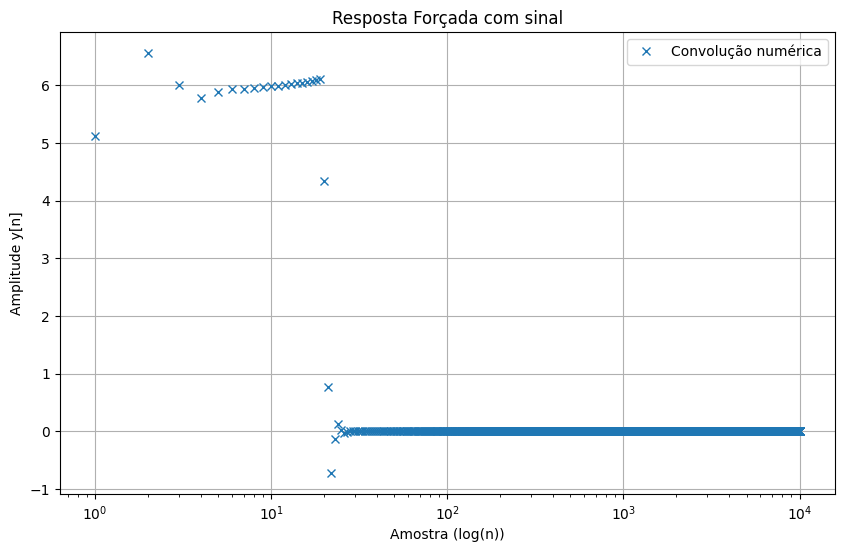

In [129]:
#plot comparativo
x = np.arange(len(sinal ))

plt.figure(figsize=(10, 6))

# Plota os dados com marcadores, sem linhas de conexão
plt.plot(x, resposta_convolucao_convolucao(sinal), marker='x', linestyle='None', label='Convolução numérica')

# --- CORREÇÃO APLICADA AQUI ---
# Define os rótulos dos eixos(x em log para melhor visualização) e a legenda em chamadas separadas
plt.xscale('log')
plt.xlabel('Amostra (log(n))')
plt.ylabel('Amplitude y[n]')
plt.legend()

# Define o título e a grade
plt.title('Resposta Forçada com sinal')
plt.grid(True)

# Mostra o gráfico
plt.show()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

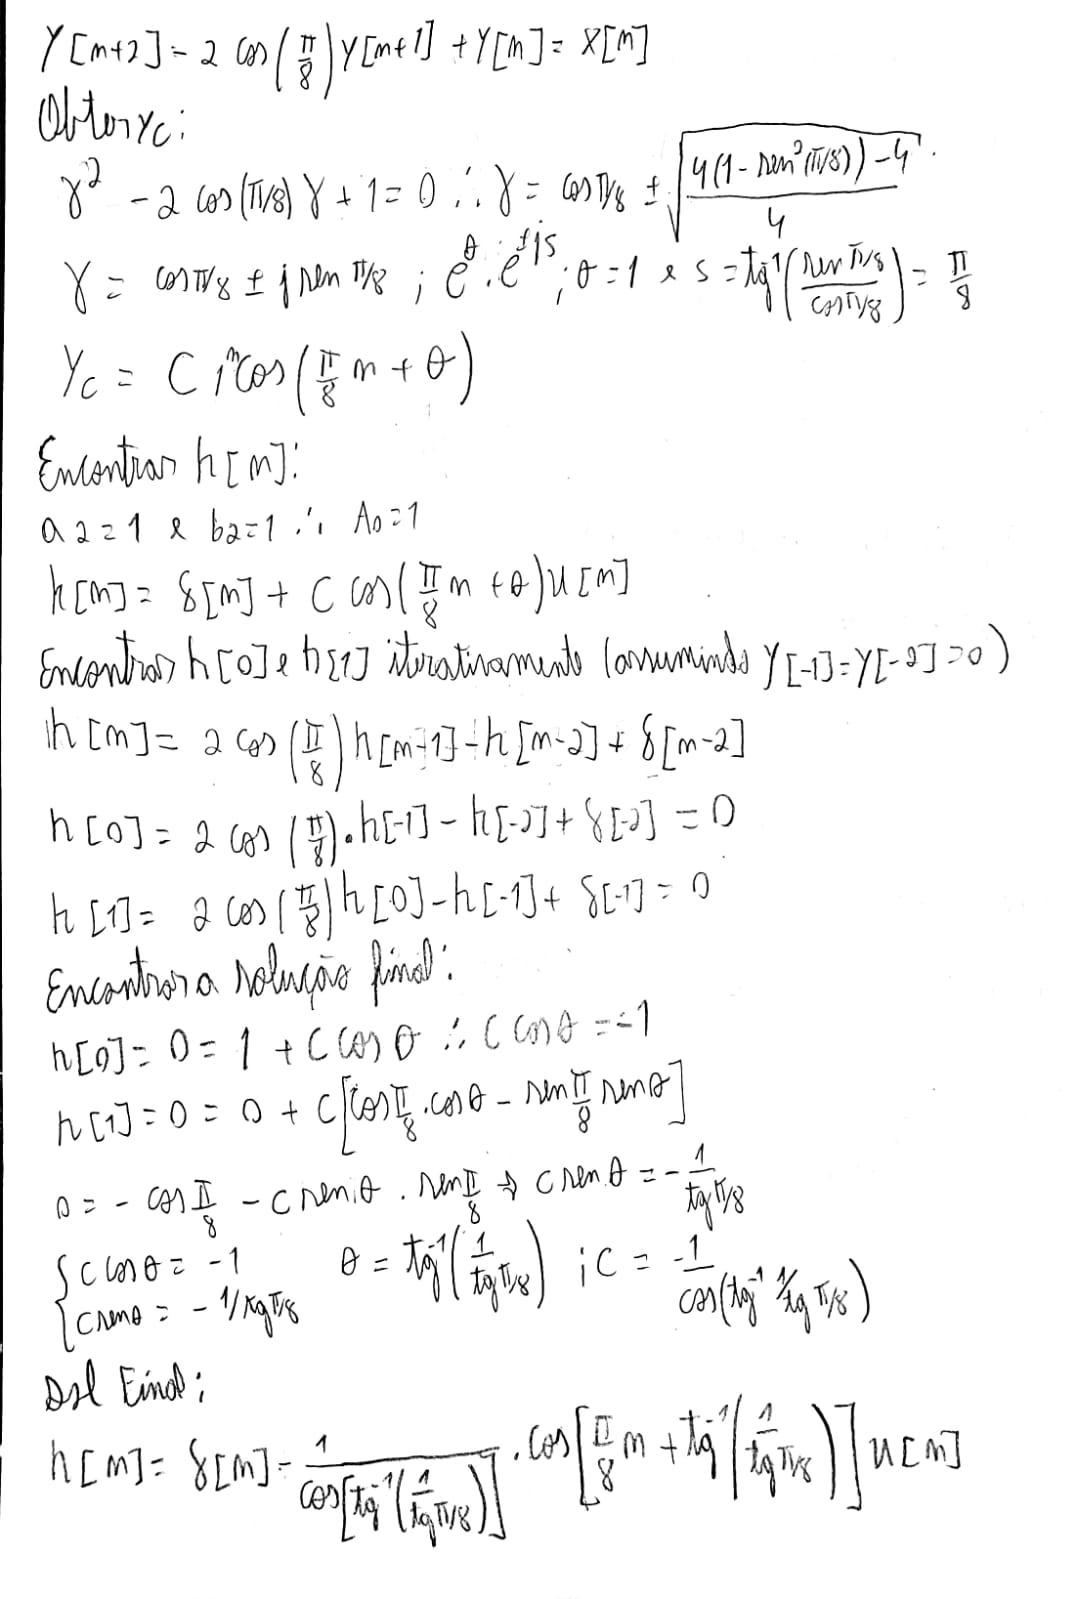

In [130]:
### Código da questão 3a

i3a = Image.open("sol3a.jpeg")

i3a

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

In [131]:
### Código da questão 3b
def impulso(n):
  if n == 0:
    return 1
  else:
    return 0

In [132]:
#Resposta iterativa

def resposta_ao_impulso_iterativa3(x):
  y = np.array([])
  for i in range(len(x)):
    if i < 2:
      calculo = impulso(i-2)
      y = np.append(y, calculo)
    elif i == 2:
      calculo = 2*np.cos(np.pi/8)*y[i-1] - y[i-2] + impulso(i-2)
      y = np.append(y, calculo)
    else:
      y = np.append(y, 2*np.cos(np.pi/8)*y[i-1] - y[i-2] )
  return y


In [133]:
#Resposta Analitica
def resposta_ao_impulso_analitica3(x):
  y = np.array([])
  theta = np.arctan(1/np.tan(np.pi/8))
  C     = -1/np.cos(theta)
  for i in range(len(x)):
    calculo = impulso(i) + C * np.cos(i*np.pi/8 + theta)

    y = np.append(y, calculo)
  return y

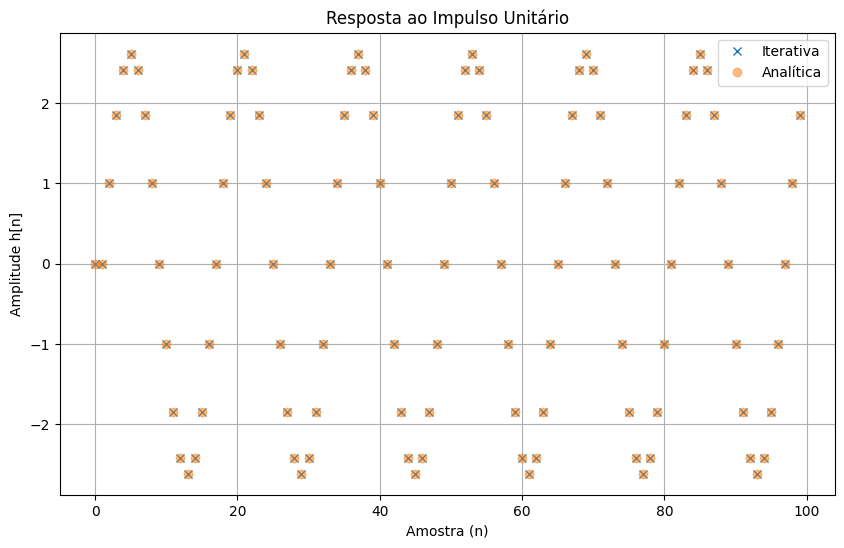

In [134]:
#plot comparativo
x = np.arange(100)

plt.figure(figsize=(10, 6))

# Plota os dados com marcadores, sem linhas de conexão
plt.plot(x, resposta_ao_impulso_iterativa3(x), marker='x', linestyle='None', label='Iterativa')
plt.plot(x, resposta_ao_impulso_analitica3(x), marker='o', linestyle='None', label='Analítica', alpha=0.5)

# --- CORREÇÃO APLICADA AQUI ---
# Define os rótulos dos eixos e a legenda em chamadas separadas
plt.xlabel('Amostra (n)')
plt.ylabel('Amplitude h[n]')
plt.legend()

# Define o título e a grade
plt.title('Resposta ao Impulso Unitário')
plt.grid(True)

# Mostra o gráfico
plt.show()

In [135]:
def MSE(func1,func2,x):
  mse = 0
  func_A = func1(x)
  func_B = func2(x)
  for i in range(len(x)):
    mse += (func_A[i] - func_B[i])**2
  return mse/len(x)

#inicializa x
x = np.arange(100)

#Print do valor
print('MSE', MSE(resposta_ao_impulso_iterativa3, resposta_ao_impulso_analitica3, x))
print('O erro real é nulo, sendo apenas devido a precisão numérica do computador')

MSE 1.597660805039273e-29
O erro real é nulo, sendo apenas devido a precisão numérica do computador
